# Importing our dataset and Preparing the Data

*Data set course: https://www.kaggle.com/rounakbanik/ted-talks*

*Fillm_date and published_date collumns are in Unix timpestamp date format, we need to change them into human readeable one. We will use datetime package* 

In [7]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import linregress
import numpy

#loading up the csv file
ted = pd.read_csv("E:/python2/ted_main.csv")

#checking the columns
print(ted.columns)

#checking the row count
print('Number of rows in the data set: '+str(len(ted)))

#reordering our columns depending on our preferences 
ted = ted[['main_speaker','title','event','comments',
           'views','duration', 'languages', 'num_speaker', 
           'film_date','published_date','speaker_occupation',  
           'tags','ratings','name','url','description', 'related_talks' ]]

#fixing the two timestamp columns
ted['film_date'] = ted['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
ted['published_date'] = ted['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

#seeing the final table
ted.head()

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')
Number of rows in the data set: 2550


,main_speaker,title,event,comments,views,duration,languages,num_speaker,film_date,published_date,speaker_occupation,tags,ratings,name,url,description,related_talks
0,Ken Robinson,Do schools kill creativity?,TED2006,4553,47227110,1164,60,1,25-02-2006,27-06-2006,Author/educator,"['children', 'creativity', 'culture', 'dance',...","[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",Ken Robinson: Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,Sir Ken Robinson makes an entertaining and pro...,"[{'id': 865, 'hero': 'https://pe.tedcdn.com/im..."
1,Al Gore,Averting the climate crisis,TED2006,265,3200520,977,43,1,25-02-2006,27-06-2006,Climate advocate,"['alternative energy', 'cars', 'climate change...","[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",Al Gore: Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,With the same humor and humanity he exuded in ...,"[{'id': 243, 'hero': 'https://pe.tedcdn.com/im..."
2,David Pogue,Simplicity sells,TED2006,124,1636292,1286,26,1,24-02-2006,27-06-2006,Technology columnist,"['computers', 'entertainment', 'interface desi...","[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",David Pogue: Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,New York Times columnist David Pogue takes aim...,"[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i..."
3,Majora Carter,Greening the ghetto,TED2006,200,1697550,1116,35,1,26-02-2006,27-06-2006,Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...","[{'id': 3, 'name': 'Courageous', 'count': 760}...",Majora Carter: Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,"In an emotionally charged talk, MacArthur-winn...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i..."
4,Hans Rosling,The best stats you've ever seen,TED2006,593,12005869,1190,48,1,22-02-2006,28-06-2006,Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...","[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",Hans Rosling: The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,You've never seen data presented like this. Wi...,"[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i..."


# Overall analysis about TED Talks

## Number of filmed talks over the years

<AxesSubplot:xlabel='year', ylabel='talks'>

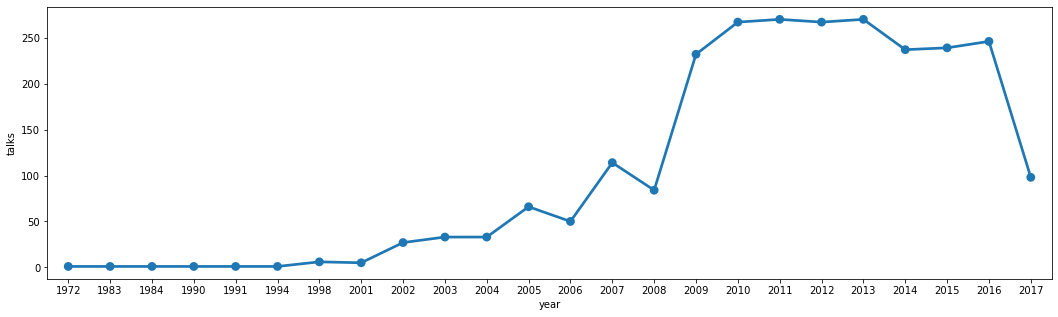

In [8]:
#we used line graph in order to see overall picture of 
ted['year'] = ted['film_date'].apply(lambda x: x.split('-')[2])
year_ted = pd.DataFrame(ted['year'].value_counts().reset_index())
year_ted.columns = ['year', 'talks']
year_ted = year_ted.sort_values('year', ascending=True)
plt.figure(figsize=(18,5))
sb.pointplot(x='year', y='talks', data=year_ted)

### *The number of TED Talks increased gradually between the years of 1972 and 2007 and from the year 2008 till the year 2009 the number of TED Talk events dubbled from about 90 talks to more than 200 talks. Let, see future projection for the number of TED Talk events by 2030 based on previous trends. We will deploy time series analysis.*

## Audience participation: views and comments

View statistics:
count        2550.0
mean      1698297.0
std       2498479.0
min         50443.0
25%        755793.0
50%       1124524.0
75%       1700760.0
max      47227110.0
Name: views, dtype: float64
--------------------------------------
Comment statistics:
count    2550.0
mean      192.0
std       282.0
min         2.0
25%        63.0
50%       118.0
75%       222.0
max      6404.0
Name: comments, dtype: float64


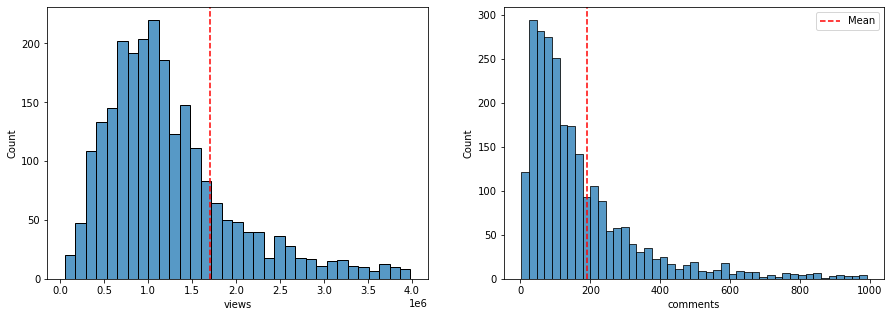

In [9]:
print('View statistics:')
print(round(ted['views'].describe()))
print('--------------------------------------')
print('Comment statistics:')
print(round(ted['comments'].describe()))


fig, axs = plt.subplots(ncols=2, figsize=(15,5))
sb.histplot(ted[ted['views'] < 4000000] ['views'], ax=axs[0])
axs[0].axvline(ted['views'].mean(), color='r', linestyle='--')
sb.histplot(ted[ted['comments'] < 1000]['comments'], ax=axs[1])
axs[1].axvline(ted['comments'].mean(), color='r', linestyle='--')
plt.legend({'Mean':ted['comments'].mean()})

# Interesting insights from the TED data

## Who are the best Speakers and what are their occupation?

           main_speaker     views                           speaker_occupation
0          Ken Robinson  47227110                              Author/educator
1346          Amy Cuddy  43155405                          Social psychologist
677         Simon Sinek  34309432                            Leadership expert
837         Brené Brown  31168150                     Vulnerability researcher
452          Mary Roach  22270883                                       Writer
1776    Julian Treasure  21594632                             Sound consultant
201   Jill Bolte Taylor  21190883                               Neuroanatomist
5          Tony Robbins  20685401  Life coach; expert in leadership psychology
2114       James Veitch  20475972                          Comedian and writer
1416    Cameron Russell  19787465                                        Model


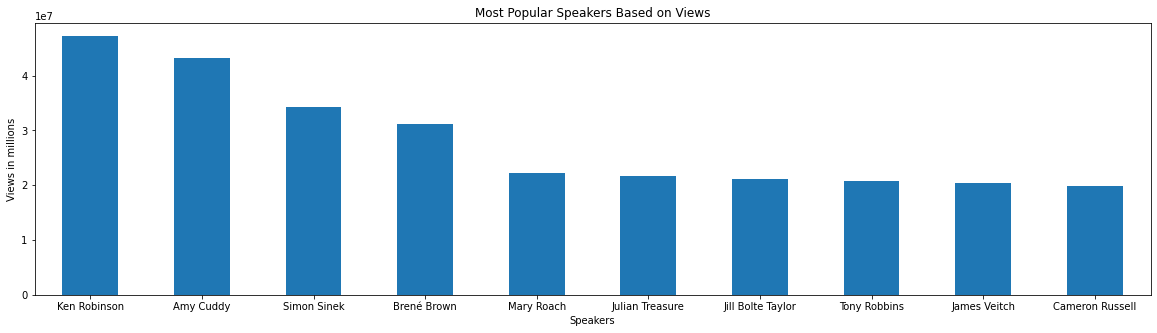

In [11]:
#We will sepect the necessary columns and find the best speakers in terms of views
tedvso = ted[['main_speaker', 'views', 'speaker_occupation']].sort_values('views', ascending = False)[:10]
print(tedvso)
tedvsoplt = tedvso.plot.bar(x='main_speaker', y='views', xlabel='Speakers', 
                            ylabel='Views in millions', rot=0, figsize=(20,5), 
                            title='Most Popular Speakers Based on Views', grid=False, legend=False)

In [13]:
speak_oc = ted[['speaker_occupation', 'views']].sort_values('views', ascending=False)[:10]
speak_oc

,speaker_occupation,views
0,Author/educator,47227110
1346,Social psychologist,43155405
677,Leadership expert,34309432
837,Vulnerability researcher,31168150
452,Writer,22270883
1776,Sound consultant,21594632
201,Neuroanatomist,21190883
5,Life coach; expert in leadership psychology,20685401
2114,Comedian and writer,20475972
1416,Model,19787465


<function matplotlib.pyplot.show(close=None, block=None)>

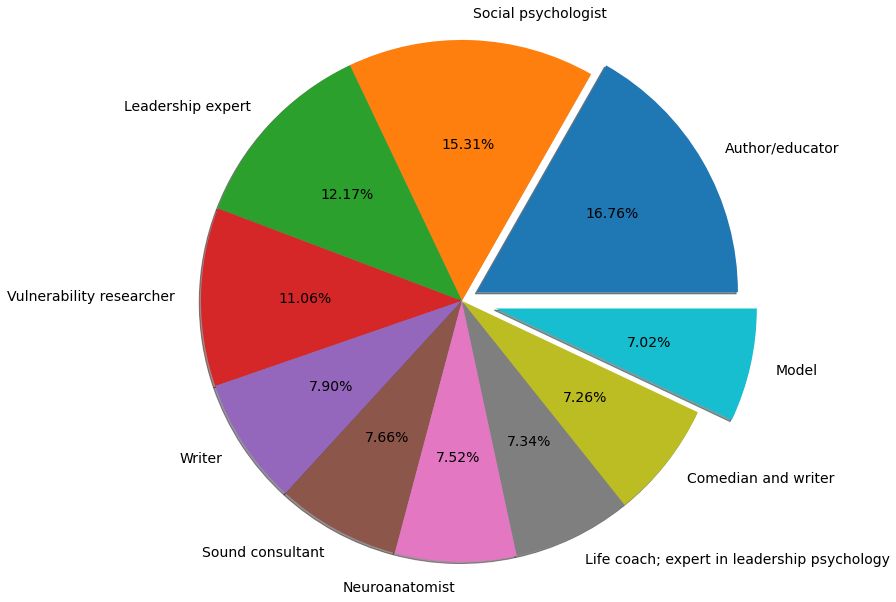

In [54]:
#We will find the occupations of the speakers
views = tedvso['views']
occupation = numpy.array(tedvso['speaker_occupation'])

plt.rcParams.update({'font.size': 14})

#We are making our pie chart equally distributed
plt.axis("equal")
plt.pie(views, labels=occupation,radius=3, shadow =True, explode=[0.2,0,0,0,0,0,0,0,0,0.4], autopct = '%.2f%%')

#In order to remove extra lables
plt.show 

### *We can conclude that author/educators's talks have generated the most views and we suggest target this sphere in order to deliver most interesting speaches.*

## Which occupation should you choose if you want to become a TED Speaker?

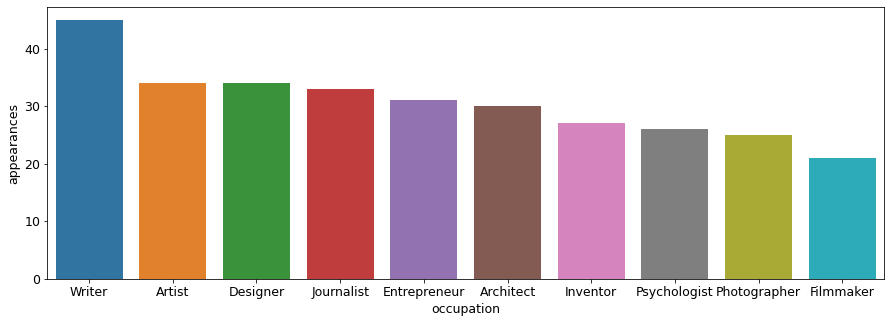

In [56]:
#lest find out which professions occured the most 

occupation_ted = ted.groupby('speaker_occupation').count().reset_index()[['speaker_occupation', 'comments']]
occupation_ted.columns = ['occupation', 'appearances']
occupation_ted = occupation_ted.sort_values('appearances', ascending=False)

plt.rcParams.update({'font.size': 12.5})
plt.figure(figsize=(15,5))
sb.barplot(x='occupation', y='appearances', data=occupation_ted.head(10))
plt.show()

### *As we can see writers are the most professionals among all speakers.*   

## What is the Best duration for a TED talk?

      duration    views
640       5256   473220
588       4587   564781
629       3955   521974
2387      3608  1514291
594       3573    50443
...        ...      ...
264        153   294961
454        143   556657
547        141   771962
248        140   680591
239        135   785293

[2550 rows x 2 columns]


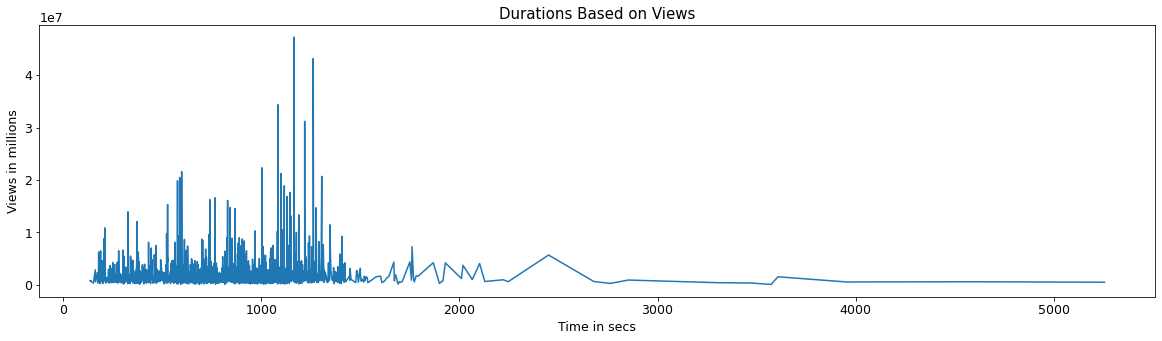

In [59]:
tedvd = ted[['duration', 'views']].sort_values('duration', ascending = False)
print(tedvd)
tedvdplt = tedvd.plot(x='duration', y='views', xlabel='Time in secs', 
                      ylabel='Views in millions', rot=0, figsize=(20,5), 
                      title='Durations Based on Views', grid=False, legend=False)

     duration    views
89       1929  4165572
206      1917   763815
285      1899   250722
276      1868  4204848
150      1791  1609555
..        ...      ...
264       153   294961
454       143   556657
547       141   771962
248       140   680591
239       135   785293

[2532 rows x 2 columns]


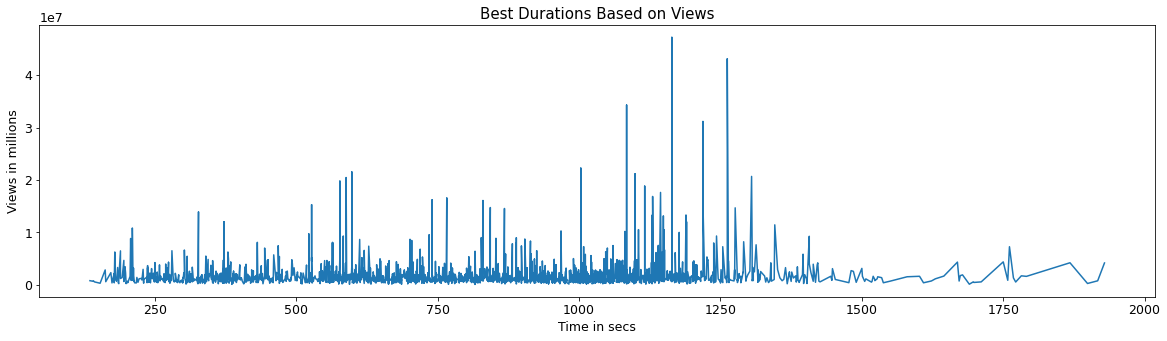

In [60]:
#Best times are between 0 and 1500 (or up to 25mins) , so shorten the time range to 2000 secs
tedvd1 = tedvd[tedvd['duration']<=2000]
print(tedvd1)
tedvdplt1 = tedvd1.plot(x='duration', y='views', xlabel='Time in secs', 
                        ylabel='Views in millions', rot=0, figsize=(20,5), 
                        title='Best Durations Based on Views', grid=False, legend=False)

### *Conclustion: The best duration of a TED Talk speech seems to be from 15 to 25 mins.*

## Do language options matter, do they impact video views?

In [61]:
#Top and Least viewed videos and their language options
tedlv_top = ted[['languages', 'views']].sort_values('views', ascending = False)[:15]
print('Top viewed videos and their translations')
print(tedlv_top)
print()
tedlv_low = ted[['languages', 'views']].sort_values('views', ascending = True)[:15]
print('Least viewed videos and their translations')
print(tedlv_low)

Top viewed videos and their translations
      languages     views
0            60  47227110
1346         51  43155405
677          45  34309432
837          52  31168150
452          37  22270883
1776         45  21594632
201          49  21190883
5            36  20685401
2114         43  20475972
1416         43  19787465
500          44  18830983
1163         44  17629275
1036         39  16861578
2109         43  16601927
1129         46  16209727

Least viewed videos and their translations
      languages   views
594           0   50443
1112          0   66668
237           0   82488
776           0  112321
1133          0  115346
1229          0  117756
1141          0  120274
1079          0  121186
1104          0  125050
1178          0  132199
1061          0  138812
1179          0  142164
1301          0  144044
1053          0  148971
590           0  149818


           languages     views
languages   1.000000  0.377623
views       0.377623  1.000000
-----------------------------------------------
LinregressResult(slope=98655.11330700453, intercept=-997579.2264543884, rvalue=0.3776230522531857, pvalue=3.140577509494685e-87, stderr=4792.403090299026)


[Text(0.5, 1.0, 'Does the number of Translations impact View count?')]

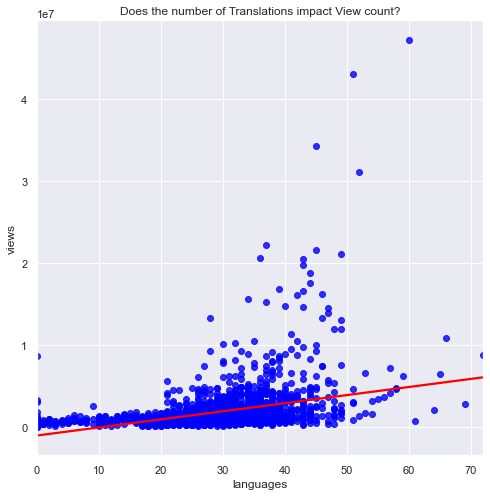

In [65]:
#Language and Views
tedlv = ted[['languages', 'views']]

#Making a correlation matrix and p-value analysis for lnguage and views
cor_mat=tedlv.corr()
print(cor_mat)
print('-----------------------------------------------')
pval=linregress(tedlv['languages'], tedlv['views'])
print(pval)

#Making a scatter plot with a regression line
sb.set(rc={'figure.figsize':(8,8)})
sb.regplot(x="languages", y="views", ci=None, data=tedlv, scatter_kws={"color": "blue"}, 
           line_kws={"color": "red"}).set(title="Does the number of Translations impact View count?")

### *Conclusion: No, language options don't seem to matter. They have a very weak relationship with Views.*

## What are the most popular TED talk themes?

In [69]:
#formatting 'tags' for easiler analysis
tedtv = ted[['tags', 'views']].sort_values('views', ascending = False)
tedtv['tags'] = tedtv['tags'].str.split(',')
tedtv

,tags,views
0,"[['children', 'creativity', 'culture', 'dan...",47227110
1346,"[['body language', 'brain', 'business', 'ps...",43155405
677,"[['TEDx', 'business', 'entrepreneur', 'lead...",34309432
837,"[['TEDx', 'communication', 'culture', 'depr...",31168150
452,"[['books', 'culture', 'history', 'humor', ...",22270883
...,...,...
1133,"[['TEDx', 'global issues', 'poverty', 'tech...",115346
776,"[['biology', 'birds', 'evolution', 'life']]",112321
237,"[['Africa', 'guitar', 'live music', 'music'...",82488
1112,"[['TEDx', 'disability', 'entertainment', 'g...",66668


In [71]:
#splitting tags into separate rows, and removing symbols
tedtv1 = (tedtv.set_index(['views'])['tags'].apply(pd.Series).stack().reset_index().drop('level_1', axis=1).rename(columns={0:'themes'}))
tedtv1['themes'] = tedtv1['themes'].replace({"'":""}, regex=True)
tedtv1['themes'] = tedtv1['themes'].replace({"\[":""}, regex=True)
tedtv1['themes'] = tedtv1['themes'].replace({"\]":""}, regex=True)
print(tedtv1)

print('-----------------------------------------------')
print('Number of unique themes: '+str(tedtv1['themes'].nunique()))

          views            themes
0      47227110          children
1      47227110        creativity
2      47227110           culture
3      47227110             dance
4      47227110         education
...         ...               ...
19149     50443             books
19150     50443   disaster relief
19151     50443             novel
19152     50443            poetry
19153     50443      storytelling

[19154 rows x 2 columns]
-----------------------------------------------
Number of unique themes: 594


In [72]:
#make a frequency table for all themes
ted_theme=pd.value_counts(tedtv1.themes).to_frame().reset_index()
ted_theme.columns=['Theme','Frequency']
ted_theme

,Theme,Frequency
0,technology,726
1,science,567
2,global issues,480
3,design,392
4,culture,380
...,...,...
589,disability,1
590,TEDNYC,1
591,goal-setting,1
592,medicine,1


            Theme  Frequency
0      technology        726
1         science        567
2   global issues        480
3          design        392
4         culture        380
5            TEDx        322
6   entertainment        260
7          health        229
8      innovation        228
9         society        224


<AxesSubplot:title={'center':'Most Popular Themes Based'}, xlabel='Themes', ylabel='Popularity'>

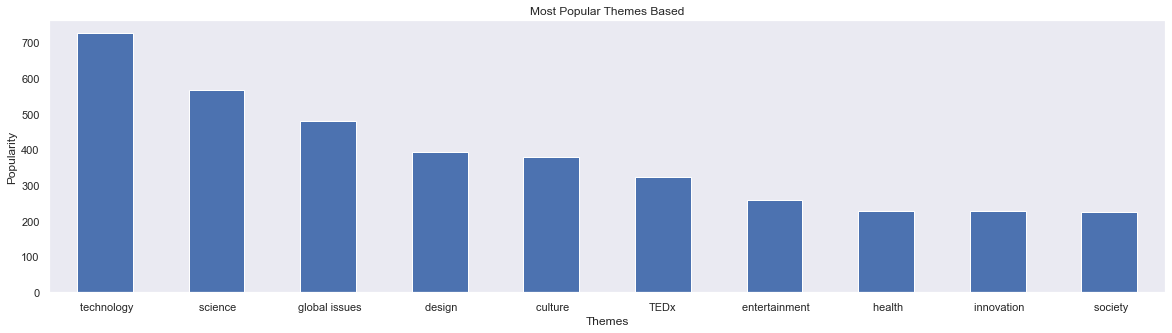

In [77]:
#select the top 10 themes from the frequency table
ted_theme_top=ted_theme[['Theme', 'Frequency']].sort_values('Frequency', ascending=False)[:10]
print(ted_theme_top)

#make a barplot for the top 10 themes
ted_theme_topplt=ted_theme_top.plot.bar(x='Theme', y='Frequency', xlabel='Themes', ylabel='Popularity', rot=0, figsize=(20,5), title='Most Popular Themes Based', grid=False, legend=False)
ted_theme_topplt

In [78]:
#based on the mean and the st.dev. we can assume that the best videos must be above 4 mil views
print('View statistics:')
print(round(ted['views'].describe()))

View statistics:
count        2550.0
mean      1698297.0
std       2498479.0
min         50443.0
25%        755793.0
50%       1124524.0
75%       1700760.0
max      47227110.0
Name: views, dtype: float64


------------------------------------------
All that are over 4 mil views:
         views          themes
0     47227110        children
1     47227110      creativity
2     47227110         culture
3     47227110           dance
4     47227110       education
...        ...             ...
1078   4016531   global issues
1079   4016531       happiness
1080   4016531           music
1081   4016531      psychology
1082   4016531            work

[1083 rows x 2 columns]
------------------------------------------
Frequency table:
                        Theme  Frequency
0                     culture         40
1                  technology         38
2               entertainment         30
3                     science         30
4                  psychology         28
..                        ...        ...
270                      Asia          1
271                       law          1
272                    drones          1
273  Autism spectrum disorder          1
274               

<AxesSubplot:title={'center':'Most Popular Themes Based'}, xlabel='Themes', ylabel='Popularity'>

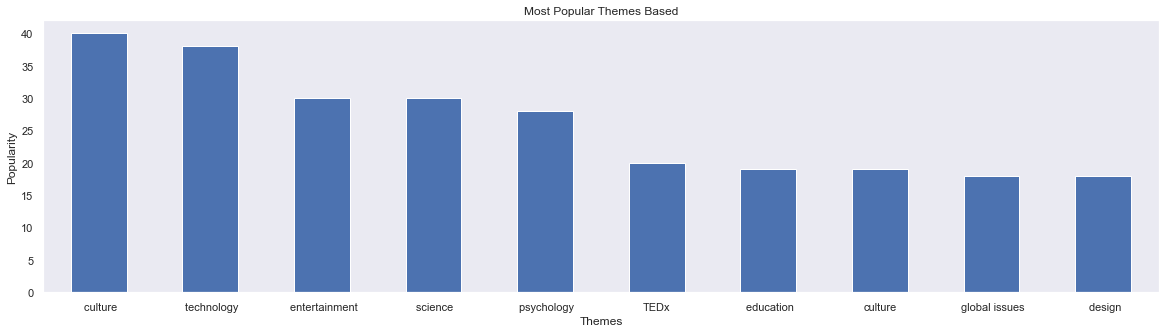

In [81]:
#selecting the most viewed videos to find popular themes
ted_views_top = tedtv1[tedtv1['views']>=4000000]
print('------------------------------------------')
print('All that are over 4 mil views:')
print(ted_views_top)
print('------------------------------------------')

#make a frequency table for all themes
ted_theme1=pd.value_counts(ted_views_top.themes).to_frame().reset_index()
ted_theme1.columns=['Theme','Frequency']
print('Frequency table:')
print(ted_theme1)
print('------------------------------------------')

#select the top 10 themes from the frequency table
ted_theme1_top=ted_theme1[['Theme', 'Frequency']].sort_values('Frequency', ascending=False)[:10]
print('The top 10 from the Frequency table:')
print(ted_theme1_top)
print('------------------------------------------')

#make a barplot for the top 10 themes
ted_theme1_topplt=ted_theme1_top.plot.bar(x='Theme', y='Frequency', xlabel='Themes', ylabel='Popularity', rot=0, figsize=(20,5), title='Most Popular Themes Based', grid=False, legend=False)
ted_theme1_topplt

The most frequenctly seen and most viewed themes:
{'TEDx', ' technology', ' entertainment', ' culture', ' design', ' science', ' global issues'}
------------------------------------------


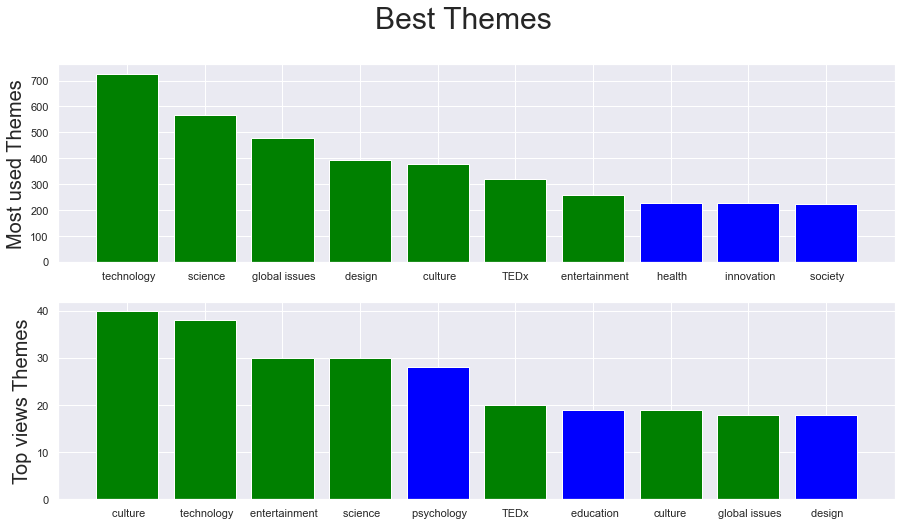

In [84]:
#compare top most frequently used themes with top themes based on views 
pop_theme = set(ted_theme_top['Theme']) & set(ted_theme1_top['Theme'])
print('The most frequenctly seen and most viewed themes:')
print(pop_theme)
print('------------------------------------------')

#plot the common themes via bar charts
fig, az = plt.subplots(2, figsize=(15,8))
fig.suptitle('Best Themes', size=30)
az[0].bar(ted_theme_top['Theme'], ted_theme_top['Frequency'], color=['green', 'green', 'green', 'green', 'green', 'green', 'green', 'blue', 'blue', 'blue', ])
az[0].set_ylabel('Most used Themes', size=20)
az[1].bar(ted_theme1_top['Theme'], ted_theme1_top['Frequency'], color=['green', 'green', 'green', 'green', 'blue', 'green', 'blue', 'green', 'green', 'blue', ])
az[1].set_ylabel('Top views Themes', size=20)
plt.xticks(ted_theme1_top['Theme'])
plt.show()
#the popularity of ['science','health','innovation','society'] theme is overestimated 
#while the popularity of ['psychology','education','global issues'] themes is underestimated 

### *Conclusion: Technology, Science, Global, issues, Design, Culture, TEDx, Entertainment are the best themes for a TED talk. However, there are overappreciated and underappreciated themes. While Health, Innovation, and Society are overused, Psychology, Education, and Design are underused by TED talkers.*

## Does having a ? or ! in the title matter?

In [86]:
tednv = ted[['title', 'views']].sort_values('views', ascending = False)
print(tednv)
print('------------------------------------------------------------')

#which type of titles are mostly used?
tednv_q=tednv.loc[tednv['title'].str.endswith('?')]
tednv_e=tednv.loc[tednv['title'].str.endswith('!')]
totqf=len(tednv_e.index)
totef=len(tednv_q.index)
totsf=len(tednv.index)-len(tednv_q.index)-len(tednv_e.index)
print('Based on frequency:')
print('Number of Question titles: '+ str(totqf))
print('Number of Exclamation titles: '+ str(totef))
print('Number of Statement titles: '+ str(totsf))

#which titles types are most successful view generators?
tednv_top = tednv[tednv['views']>=4000000]
tednv_topq=tednv_top.loc[tednv_top['title'].str.endswith('?')]
tednv_tope=tednv_top.loc[tednv_top['title'].str.endswith('!')]
totqv=len(tednv_tope.index)
totev=len(tednv_topq.index)
totsv=len(tednv_top.index)-len(tednv_topq.index)-len(tednv_tope.index)
print('------------------------------------------------------------')
print('Based on the top views:')
print('Number of Question titles: '+ str(totqv))
print('Number of Exclamation titles: '+ str(totev))
print('Number of Statement titles: '+ str(totsv))

#how many of the made titles make it above the 4 mil view level
print('------------------------------------------------------------')
print('Success rate (%):')
print('Number of Question titles: '+ str(round((totqv/totqf)*100,2)))
print('Number of Exclamation titles: '+ str(round((totev/totef)*100,2)))
print('Number of Statement titles: '+ str(round((totsv/totsf)*100,2)))

#the difference between them is not so big, but the best seems to be '!' titles

                                         title     views
0                  Do schools kill creativity?  47227110
1346  Your body language may shape who you are  43155405
677           How great leaders inspire action  34309432
837                 The power of vulnerability  31168150
452     10 things you didn't know about orgasm  22270883
...                                        ...       ...
1133          Let's bridge the digital divide!    115346
776                     The early birdwatchers    112321
237                                 "Kounandi"     82488
1112    The debut of the British Paraorchestra     66668
594                           Stories of Haiti     50443

[2550 rows x 2 columns]
------------------------------------------------------------
Based on frequency:
Number of Question titles: 38
Number of Exclamation titles: 159
Number of Statement titles: 2353
------------------------------------------------------------
Based on the top views:
Number of Question titles: 2

### *Conclusion: The type title (?, !, .) does not matter. But "!" type titles seem to peform a tiny bit better than the rest.*

## What is the optimal length of a TED talk title?


In [89]:
#count all the words for each title row
tednv['count'] = tednv['title'].str.split().str.len()
print(tednv)
print('------------------------------------------------------------')
#Let's do some descriptive analysis for the title legth
print('Title legth statistics:')
print(round(tednv['count'].describe()))
print('------------------------------------------------------------')

                                         title     views  count
0                  Do schools kill creativity?  47227110      4
1346  Your body language may shape who you are  43155405      8
677           How great leaders inspire action  34309432      5
837                 The power of vulnerability  31168150      4
452     10 things you didn't know about orgasm  22270883      7
...                                        ...       ...    ...
1133          Let's bridge the digital divide!    115346      5
776                     The early birdwatchers    112321      3
237                                 "Kounandi"     82488      1
1112    The debut of the British Paraorchestra     66668      6
594                           Stories of Haiti     50443      3

[2550 rows x 3 columns]
------------------------------------------------------------
Title legth statistics:
count    2550.0
mean        6.0
std         2.0
min         1.0
25%         5.0
50%         6.0
75%         8.0
max       

In [90]:
#most fequent title lengths
tednv1=tednv[['views','count']].sort_values('views', ascending=False)
tednv_count=pd.value_counts(tednv1['count']).to_frame().reset_index()
tednv_count.columns=['Count','Frequency']
totcount = tednv_count['Frequency'].sum()
tednv_count['Percentage (%)'] = round((tednv_count.Frequency / totcount)*100, 2)
tednv_count['Cumulative (%)'] = round(100 * (tednv_count['Frequency'].cumsum()/tednv_count['Frequency'].sum()), 2)
tednv_count
# 90% of nost common title legths are 3-9 words long

,Count,Frequency,Percentage (%),Cumulative (%)
0,5,499,19.57,19.57
1,6,498,19.53,39.10
2,7,343,13.45,52.55
3,4,336,13.18,65.73
4,8,263,10.31,76.04
5,3,176,6.90,82.94
6,9,160,6.27,89.22
7,10,99,3.88,93.10
8,11,57,2.24,95.33
9,2,44,1.73,97.06


In [91]:
#most fequent title lengths
tednv2=tednv1[tednv['views']>=4000000]
tednv_count1=pd.value_counts(tednv2['count']).to_frame().reset_index()
tednv_count1.columns=['Count','Frequency']
totcount1 = tednv_count1['Frequency'].sum()
tednv_count1['Percentage (%)'] = round((tednv_count1.Frequency / totcount1)*100, 2)
tednv_count1['Cumulative (%)'] = round(100 * (tednv_count1['Frequency'].cumsum()/tednv_count1['Frequency'].sum()), 2)
tednv_count1
# almost 90% of most popular title legths are 4-9 words long

,Count,Frequency,Percentage (%),Cumulative (%)
0,6,39,23.35,23.35
1,4,29,17.37,40.72
2,5,28,16.77,57.49
3,7,20,11.98,69.46
4,8,18,10.78,80.24
5,9,12,7.19,87.43
6,3,5,2.99,90.42
7,12,4,2.40,92.81
8,10,4,2.40,95.21
9,2,4,2.40,97.60


### *Conclusion: The best title length for a TED talk is from 4-9 words.*